# 线性回归

In [42]:
# 生成数据集
import torch
import numpy as np

num_features, num_examples = 2, 1000
w_true, b_true = [2, -3.4], 4.2
features = torch.randn(num_examples, num_features, dtype=torch.float32)
labels = w_true[0] * features[:,0] + w_true[1] * features[:,1] + b_true
# 添加噪声
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
features[0], labels[0]

(tensor([ 1.9223, -1.6502]), tensor(13.6424))

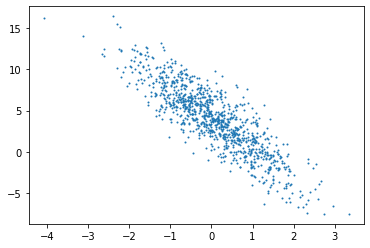

In [37]:
# 绘制散点图
from matplotlib import pyplot as plt

plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
plt.show()

In [38]:
# 读取数据集，每次读取batch_size大小的数据处理
import random

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indexs = list(range(num_examples))
    # 随机读取
    random.shuffle(indexs)
    for i in range(0, num_examples, batch_size):
        indices = torch.LongTensor(indexs[i:min(i + batch_size, num_examples)])
        yield features.index_select(0, indices), labels.index_select(0, indices)

batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break

tensor([[-0.2690, -1.7546],
        [ 1.2472,  1.2687],
        [-1.2272,  0.0588],
        [ 0.0339, -0.1243],
        [-1.2129, -0.1834],
        [-1.4605, -1.6168],
        [-0.8641, -0.4398],
        [ 0.0192,  0.9621],
        [-0.8707,  1.9174],
        [-0.2451, -0.3066]]) tensor([ 9.6242,  2.3817,  1.5432,  4.6929,  2.3946,  6.7868,  3.9577,  0.9708,
        -4.0495,  4.7542])


In [39]:
# 初始化模型参数 w,b
w = torch.tensor(np.random.normal(0, 0.01, (num_features, 1)), 
                    dtype=torch.float32,
                    requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [40]:
# 定义模型相关
## 定义模型
def linreg(x, w, b):
    return x @ w + b

## 定义损失函数
def loss_squard(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 定义优化算法 params = [w, b]
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [41]:
# 模型训练（小批量随机梯度下降）
lr, epochs, loss, network = 0.03, 3, loss_squard, linreg

for i in range(epochs):
    # 每个迭代周期对全部数据训练一遍
    for x, y in data_iter(batch_size, features, labels):
        y_hat = network(x, w, b)
        l = loss(y_hat, y).sum()
        l.backward()                    # 自动计算梯度
        sgd([w, b], lr, batch_size)     # 梯度下降
        w.grad.data.zero_()
        b.grad.data.zero_()
    l_train = loss(network(features, w, b), labels).mean().item()
    print('epoch %d, loss %f' % (i+1, l_train))
print(w_true, w)
print(b_true, b)

epoch 1, loss 0.048957
epoch 2, loss 0.000203
epoch 3, loss 0.000048
[2, -3.4] tensor([[ 1.9993],
        [-3.4002]], requires_grad=True)
4.2 tensor([4.1994], requires_grad=True)
